In [ ]:
import pandas as pd
import glob

# Get all CSV files from /content/
file_paths = glob.glob("/content/*.csv")  # Finds all CSV files in Colab's storage

# Load all CSV files
dfs = [pd.read_csv(file, encoding='latin1') for file in file_paths]

# Combine datasets
df = pd.concat(dfs, ignore_index=True)

# Fix column names (strip spaces & weird characters)
df.columns = df.columns.str.strip()

# Rename the Date column (if corrupted)
df.rename(columns={"ï»¿Date": "Date"}, inplace=True)

# Convert Date column to proper format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Drop rows where essential fields are missing
df.dropna(subset=["Title", "Date"], inplace=True)

# Fill missing author names with "Unknown"
df["Author"].fillna("Unknown", inplace=True)

# Standardize text (strip spaces, lowercase for consistency)
df["Title"] = df["Title"].str.strip().str.title()
df["Author"] = df["Author"].str.strip().str.title()
df["Category"] = df["Category"].fillna("Unknown").str.strip().str.upper()
df["Department"] = df["Department"].fillna("Unknown").str.strip().str.upper()

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Preview cleaned data
print("✅ Deep Cleaning Done!")
print(df.info())
print(df.head())

# Save cleaned file
df.to_csv("/content/Cleaned_Library_Data.csv", index=False)
print("✅ Cleaned dataset saved as 'Cleaned_Library_Data.csv' in Colab!")


<ipython-input-4-39b8f1457529>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Author"].fillna("Unknown", inplace=True)


✅ Deep Cleaning Done!
<class 'pandas.core.frame.DataFrame'>
Index: 97383 entries, 0 to 105541
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           97383 non-null  datetime64[ns]
 1   Card_number    27613 non-null  object        
 2   Name           44490 non-null  object        
 3   Department     97383 non-null  object        
 4   Category       97383 non-null  object        
 5   Transaction    97383 non-null  object        
 6   Amount         73883 non-null  object        
 7   Barcode        97383 non-null  object        
 8   Title          97383 non-null  object        
 9   Author         97383 non-null  object        
 10  homebranch     97381 non-null  object        
 11  holdingbranch  97383 non-null  object        
 12  card_number    52893 non-null  object        
 13  full_name      52893 non-null  object        
 14  Card Number    16877 non-null  object        
dtypes

In [ ]:
import pandas as pd
import numpy as np
import glob

# Get all CSV files from /content/
file_paths = glob.glob("/content/*.csv")

# Load all CSV files with proper dtype handling
dfs = [pd.read_csv(file, encoding='latin1', low_memory=False) for file in file_paths]

# Combine datasets
df = pd.concat(dfs, ignore_index=True)

# 🔹 1️⃣ STRUCTURAL FIXES
df.columns = df.columns.str.strip()  # Fix column names
df = df.loc[:, ~df.columns.duplicated()]  # Drop duplicate columns if any

# 🔹 2️⃣ FIX DATA TYPE ISSUES
# Convert Date column to datetime format (handle errors)
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# 🔹 3️⃣ HANDLE MISSING VALUES
df.dropna(subset=["Title", "Date"], inplace=True)  # Drop if Title or Date is missing
df["Author"].fillna("Unknown", inplace=True)
df["Category"].fillna("Other", inplace=True)
df["Department"].fillna("Other", inplace=True)

# 🔹 4️⃣ FIX TEXT FORMATTING
df["Title"] = df["Title"].astype(str).str.strip().str.title()
df["Author"] = df["Author"].astype(str).str.strip().str.title()
df["Category"] = df["Category"].astype(str).str.strip().str.upper()
df["Department"] = df["Department"].astype(str).str.strip().str.upper()

# 🔹 5️⃣ REMOVE DUPLICATES
df.drop_duplicates(inplace=True)

# 🔹 6️⃣ REMOVE IRRELEVANT COLUMNS
drop_cols = ["Unnamed: 0"] if "Unnamed: 0" in df.columns else []
df.drop(columns=drop_cols, inplace=True)

# 🔹 7️⃣ FINAL CLEANED DATASET CHECK
print("✅ Super Intensive Cleaning Done!")
print(df.info())
print(df.head())

# Save cleaned file
df.to_csv("/content/Cleaned_Library_Data.csv", index=False)
print("✅ Cleaned dataset saved as 'Cleaned_Library_Data.csv' in Colab!")


<ipython-input-7-3bd797764ea7>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Author"].fillna("Unknown", inplace=True)
<ipython-input-7-3bd797764ea7>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

✅ Super Intensive Cleaning Done!
<class 'pandas.core.frame.DataFrame'>
Index: 97383 entries, 0 to 97382
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           97383 non-null  datetime64[ns]
 1   Card_number    27613 non-null  object        
 2   Name           44490 non-null  object        
 3   Department     97383 non-null  object        
 4   Category       97383 non-null  object        
 5   Transaction    97383 non-null  object        
 6   Amount         73883 non-null  object        
 7   Barcode        97383 non-null  object        
 8   Title          97383 non-null  object        
 9   Author         97383 non-null  object        
 10  homebranch     97381 non-null  object        
 11  holdingbranch  97383 non-null  object        
 12  card_number    52893 non-null  object        
 13  full_name      52893 non-null  object        
 14  Card Number    16877 non-null  object     

In [ ]:
import pandas as pd
import numpy as np
import glob

# Get all CSV files from /content/
file_paths = glob.glob("/content/*.csv")

# Load all CSV files with explicit data types to prevent mixed types warning
dtype_mapping = {
    "Title": str, "Author": str, "Category": str, "Department": str
}
dfs = [pd.read_csv(file, encoding='latin1', dtype=dtype_mapping, low_memory=False) for file in file_paths]

# Combine datasets
df = pd.concat(dfs, ignore_index=True)

# 🔹 1️⃣ FIX COLUMN NAMES & REMOVE DUPLICATES
df.columns = df.columns.str.strip()  # Remove extra spaces
df = df.loc[:, ~df.columns.duplicated()]  # Drop duplicate columns

# 🔹 2️⃣ FIX DATE COLUMN PROPERLY
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# 🔹 3️⃣ HANDLE MISSING VALUES
df.dropna(subset=["Title", "Date"], inplace=True)  # Drop if Title or Date is missing
df["Author"].fillna("Unknown", inplace=True)
df["Category"].fillna("Other", inplace=True)
df["Department"].fillna("Other", inplace=True)

# 🔹 4️⃣ FIX TEXT FORMATTING
df["Title"] = df["Title"].astype(str).str.strip().str.title()
df["Author"] = df["Author"].astype(str).str.strip().str.title()
df["Category"] = df["Category"].astype(str).str.strip().str.upper()
df["Department"] = df["Department"].astype(str).str.strip().str.upper()

# 🔹 5️⃣ REMOVE DUPLICATES
df.drop_duplicates(inplace=True)

# 🔹 6️⃣ REMOVE UNWANTED COLUMNS
drop_cols = ["Unnamed: 0"] if "Unnamed: 0" in df.columns else []
df.drop(columns=drop_cols, inplace=True)

# 🔹 7️⃣ FINAL CHECK
print("✅ Final Intensive Cleaning Done!")
print(df.info())
print(df.head())

# Save cleaned file
df.to_csv("/content/Cleaned_Library_Data.csv", index=False)
print("✅ Cleaned dataset saved as 'Cleaned_Library_Data.csv' in Colab!")


<ipython-input-9-8776b6695004>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Author"].fillna("Unknown", inplace=True)
<ipython-input-9-8776b6695004>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

✅ Final Intensive Cleaning Done!
<class 'pandas.core.frame.DataFrame'>
Index: 97383 entries, 0 to 97382
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           97383 non-null  datetime64[ns]
 1   Card_number    27613 non-null  object        
 2   Name           44490 non-null  object        
 3   Department     97383 non-null  object        
 4   Category       97383 non-null  object        
 5   Transaction    97383 non-null  object        
 6   Amount         73883 non-null  object        
 7   Barcode        97383 non-null  object        
 8   Title          97383 non-null  object        
 9   Author         97383 non-null  object        
 10  homebranch     97381 non-null  object        
 11  holdingbranch  97383 non-null  object        
 12  card_number    52893 non-null  object        
 13  full_name      52893 non-null  object        
 14  Card Number    16877 non-null  object     

In [ ]:
import pandas as pd

# Load the cleaned dataset
file_path = "/content/Cleaned_Library_Data.csv"  # Change if needed
df = pd.read_csv(file_path)

# Display first 50 rows
df.head(50)


<ipython-input-11-6f99849f677f>:5: DtypeWarning: Columns (1,2,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Date Card_number    Name            Department Category  \
0   2023-07-01 08:58:04      RVXB8C  ML5GDS                CSE_CY       UG   
1   2023-07-01 09:19:09      8S6ID3  DDPQS8                  CHEM       UG   
2   2023-07-01 09:19:15      8S6ID3  DDPQS8                  CHEM       UG   
3   2023-07-01 09:19:28      8S6ID3  DDPQS8                  CHEM       UG   
4   2023-07-01 09:38:20      90I132  G1SY7J               UNKNOWN       TS   
5   2023-07-01 10:07:13      SJ4LVX  EX9129              CSE_AIML       UG   
6   2023-07-01 10:19:28      Q5C9GQ  4WGYZF  UNDER GRADUATION(UG)       ST   
7   2023-07-01 10:48:37      0SWZI6  N31UUE  UNDER GRADUATION(UG)       UG   
8   2023-07-01 10:50:00      GWPRUL  QEP70F  UNDER GRADUATION(UG)       UG   
9   2023-07-01 10:51:08      K2H7P9  V32A7Y  UNDER GRADUATION(UG)       ST   
10  2023-07-01 10:51:14      K2H7P9  V32A7Y  UNDER GRADUATION(UG)       ST   
11  2023-07-01 10:51:19      K2H7P9  V32A7Y  UNDER GRADUATION(UG)       ST   
12  2023-07-01 10:53:25      NU6J2C  0M40KQ  UNDER GRADUATION(UG)       UG   
13  2023-07-01 10:54:02      638RDC  HOSL89                    ME       UG   
14  2023-07-01 10:55:53      ZFYRLG  29GIQS  UNDER GRADUATION(UG)       ST   
15  2023-07-01 10:56:27      JXRTS6  9GPTHS  UNDER GRADUATION(UG)       UG   
16  2023-07-01 10:58:50      RZCK2D  QFI8F6  UNDER GRADUATION(UG)       UG   
17  2023-07-01 10:59:21      BLUGLM  VKO7ON                   CSE       UG   
18  2023-07-01 10:59:56      W0PFTO  1ED4V2                  AIML       UG   
19  2023-07-01 11:02:56      AKUCYH  97AUJB                    BT       ST   
20  2023-07-01 11:03:02      AKUCYH  97AUJB                    BT       ST   
21  2023-07-01 11:03:06      AOE43Z  OSWNGY                CSE_CY       UG   
22  2023-07-01 11:04:18      638RDC  HOSL89                    ME       UG   
23  2023-07-01 11:04:28      SIR0IK  9XOT0L                    ME       UG   
24  2023-07-01 11:04:34      SIR0IK  9XOT0L                    ME       UG   
25  2023-07-01 11:05:27      5OLXKE  Q9ZT45                    BT       ST   
26  2023-07-01 11:09:16      PKJ2E5  G8EQA4                   MCA       PG   
27  2023-07-01 11:09:33      PKJ2E5  G8EQA4                   MCA       PG   
28  2023-07-01 11:09:46      PKJ2E5  G8EQA4                   MCA       PG   
29  2023-07-01 11:11:08      W8ODTU  WQZ96G                   MCA       PG   
30  2023-07-01 11:11:34      W8ODTU  WQZ96G                   MCA       PG   
31  2023-07-01 11:18:36      98OPWH  VMQPS1                    BT       ST   
32  2023-07-01 11:25:13      CKFQC9  EFOU8G  UNDER GRADUATION(UG)       ST   
33  2023-07-01 11:43:20      7N1CRY  A0B5Z9  UNDER GRADUATION(UG)       UG   
34  2023-07-01 11:43:49      7N1CRY  A0B5Z9  UNDER GRADUATION(UG)       UG   
35  2023-07-01 11:49:47      QPCBUI  UL8WMG  UNDER GRADUATION(UG)       UG   
36  2023-07-01 11:50:04      QPCBUI  UL8WMG  UNDER GRADUATION(UG)       UG   
37  2023-07-01 11:50:17      DR9LRW  HWR5HN  UNDER GRADUATION(UG)       UG   
38  2023-07-01 11:59:48      4XSRAQ  V4SRHP                   IEM       UG   
39  2023-07-01 12:00:11      4XSRAQ  V4SRHP                   IEM       UG   
40  2023-07-01 12:03:29      084SXL  BZG0W9  UNDER GRADUATION(UG)       UG   
41  2023-07-01 12:07:59      VJT4ZM  WJRGJ5                   CSE       UG   
42  2023-07-01 12:08:39      VJT4ZM  WJRGJ5                   CSE       UG   
43  2023-07-01 12:09:35      S43INF  W4KX6S                   CSE       UG   
44  2023-07-01 12:15:03      DHX9D7  7T37PO  UNDER GRADUATION(UG)       ST   
45  2023-07-01 12:15:06      DHX9D7  7T37PO  UNDER GRADUATION(UG)       ST   
46  2023-07-01 12:15:28      GCN524  7UNS6M  UNDER GRADUATION(UG)       ST   
47  2023-07-01 12:15:29      NE8PGR  D6PEMY                    BT       UG   
48  2023-07-01 12:15:59      QPCBUI  UL8WMG  UNDER GRADUATION(UG)       UG   
49  2023-07-01 12:18:24      9HLQD8  E6I1E0  UNDER GRADUATION(UG)       UG   

   Transaction   Amount   Barcode  \
0  

In [15]:
import pandas as pd

# Load dataset
file_path = "/content/Cleaned_Library_Data.csv"
df = pd.read_csv(file_path, low_memory=False)

# Drop corrupted and empty columns
df.drop(columns=[col for col in df.columns if 'Ã¯' in col or 'ï»¿' in col], inplace=True, errors='ignore')

# Standardizing column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Handling duplicate columns
available_card_number_cols = [col for col in ['card_number', 'card_number_2', 'card_number_3'] if col in df.columns]
if available_card_number_cols:
    df['card_number'] = df[available_card_number_cols].bfill(axis=1).iloc[:, 0]

df['name'] = df[['name', 'full_name']].bfill(axis=1).iloc[:, 0]

drop_cols = [col for col in ['card_number_2', 'card_number_3', 'full_name'] if col in df.columns]
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Convert Date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert Amount to numeric
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# Fill missing values appropriately
df['card_number'].fillna('Unknown', inplace=True)
df['name'].fillna('Unknown', inplace=True)
df['amount'].fillna(0, inplace=True)

df.dropna(subset=['date', 'barcode', 'title'], inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

# Save cleaned dataset
cleaned_file_path = "/content/Cleaned_Library_Data_Cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")

<ipython-input-15-58fb29bfedcc>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['card_number'].fillna('Unknown', inplace=True)
<ipython-input-15-58fb29bfedcc>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Unknown', inplace=True)
<ipython-input-15-58fb29bfedcc>:32: FutureWarning: A value is trying to be set on a copy

Cleaned dataset saved to: /content/Cleaned_Library_Data_Cleaned.csv


In [20]:
# Replace 'Undergrad' with 'UNKNOWN' in department
df['department'] = df['department'].apply(lambda x: 'UNKNOWN' if x.strip().lower() == 'UNDER GRADUATION(UG)' else x)

# Save cleaned dataset
cleaned_file_path = "/content/Cleaned_Library_Data_Cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

print("Updated dataset saved successfully.")


<ipython-input-20-210bab3bead9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['department'] = df['department'].apply(lambda x: 'UNKNOWN' if x.strip().lower() == 'UNDER GRADUATION(UG)' else x)


Updated dataset saved successfully.


In [18]:
df = df.loc[:, ~df.columns.duplicated()]

In [21]:
df.head(50)

date card_number    name            department category  \
0  2023-07-01 08:58:04      RVXB8C  ML5GDS                CSE_CY       UG   
1  2023-07-01 09:19:09      8S6ID3  DDPQS8                  CHEM       UG   
2  2023-07-01 09:19:15      8S6ID3  DDPQS8                  CHEM       UG   
3  2023-07-01 09:19:28      8S6ID3  DDPQS8                  CHEM       UG   
4  2023-07-01 09:38:20      90I132  G1SY7J               UNKNOWN       TS   
5  2023-07-01 10:07:13      SJ4LVX  EX9129              CSE_AIML       UG   
6  2023-07-01 10:19:28      Q5C9GQ  4WGYZF  UNDER GRADUATION(UG)       ST   
7  2023-07-01 10:48:37      0SWZI6  N31UUE  UNDER GRADUATION(UG)       UG   
8  2023-07-01 10:50:00      GWPRUL  QEP70F  UNDER GRADUATION(UG)       UG   
9  2023-07-01 10:51:08      K2H7P9  V32A7Y  UNDER GRADUATION(UG)       ST   
10 2023-07-01 10:51:14      K2H7P9  V32A7Y  UNDER GRADUATION(UG)       ST   
11 2023-07-01 10:51:19      K2H7P9  V32A7Y  UNDER GRADUATION(UG)       ST   
12 2023-07-01 10:53:25      NU6J2C  0M40KQ  UNDER GRADUATION(UG)       UG   
13 2023-07-01 10:54:02      638RDC  HOSL89                    ME       UG   
14 2023-07-01 10:55:53      ZFYRLG  29GIQS  UNDER GRADUATION(UG)       ST   
15 2023-07-01 10:56:27      JXRTS6  9GPTHS  UNDER GRADUATION(UG)       UG   
16 2023-07-01 10:58:50      RZCK2D  QFI8F6  UNDER GRADUATION(UG)       UG   
17 2023-07-01 10:59:21      BLUGLM  VKO7ON                   CSE       UG   
18 2023-07-01 10:59:56      W0PFTO  1ED4V2                  AIML       UG   
19 2023-07-01 11:02:56      AKUCYH  97AUJB                    BT       ST   
20 2023-07-01 11:03:02      AKUCYH  97AUJB                    BT       ST   
21 2023-07-01 11:03:06      AOE43Z  OSWNGY                CSE_CY       UG   
22 2023-07-01 11:04:18      638RDC  HOSL89                    ME       UG   
23 2023-07-01 11:04:28      SIR0IK  9XOT0L                    ME       UG   
24 2023-07-01 11:04:34      SIR0IK  9XOT0L                    ME       UG   
25 2023-07-01 11:05:27      5OLXKE  Q9ZT45                    BT       ST   
26 2023-07-01 11:09:16      PKJ2E5  G8EQA4                   MCA       PG   
27 2023-07-01 11:09:33      PKJ2E5  G8EQA4                   MCA       PG   
28 2023-07-01 11:09:46      PKJ2E5  G8EQA4                   MCA       PG   
29 2023-07-01 11:11:08      W8ODTU  WQZ96G                   MCA       PG   
30 2023-07-01 11:11:34      W8ODTU  WQZ96G                   MCA       PG   
31 2023-07-01 11:18:36      98OPWH  VMQPS1                    BT       ST   
32 2023-07-01 11:25:13      CKFQC9  EFOU8G  UNDER GRADUATION(UG)       ST   
33 2023-07-01 11:43:20      7N1CRY  A0B5Z9  UNDER GRADUATION(UG)       UG   
34 2023-07-01 11:43:49      7N1CRY  A0B5Z9  UNDER GRADUATION(UG)       UG   
35 2023-07-01 11:49:47      QPCBUI  UL8WMG  UNDER GRADUATION(UG)       UG   
36 2023-07-01 11:50:04      QPCBUI  UL8WMG  UNDER GRADUATION(UG)       UG   
37 2023-07-01 11:50:17      DR9LRW  HWR5HN  UNDER GRADUATION(UG)       UG   
38 2023-07-01 11:59:48      4XSRAQ  V4SRHP                   IEM       UG   
39 2023-07-01 12:00:11      4XSRAQ  V4SRHP                   IEM       UG   
40 2023-07-01 12:03:29      084SXL  BZG0W9  UNDER GRADUATION(UG)       UG   
41 2023-07-01 12:07:59      VJT4ZM  WJRGJ5                   CSE       UG   
42 2023-07-01 12:08:39      VJT4ZM  WJRGJ5                   CSE       UG   
43 2023-07-01 12:09:35      S43INF  W4KX6S                   CSE       UG   
44 2023-07-01 12:15:03      DHX9D7  7T37PO  UNDER GRADUATION(UG)       ST   
45 2023-07-01 12:15:06      DHX9D7  7T37PO  UNDER GRADUATION(UG)       ST   
46 2023-07-01 12:15:28      GCN524  7UNS6M  UNDER GRADUATION(UG)       ST   
47 2023-07-01 12:15:29      NE8PGR  D6PEMY                    BT       UG   
48 2023-07-01 12:15:59      QPCBUI  UL8WMG  UNDER GRADUATION(UG)       UG   
49 2023-07-01 12:18:24      9HLQD8  E6I1E0  UNDER GRADUATION(UG)       UG   

   transaction  amount   barcode  \
0    Check out     0.0     99338   
1        Renew    

<ipython-input-24-5b5404b18429>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['date'], errors='coerce')


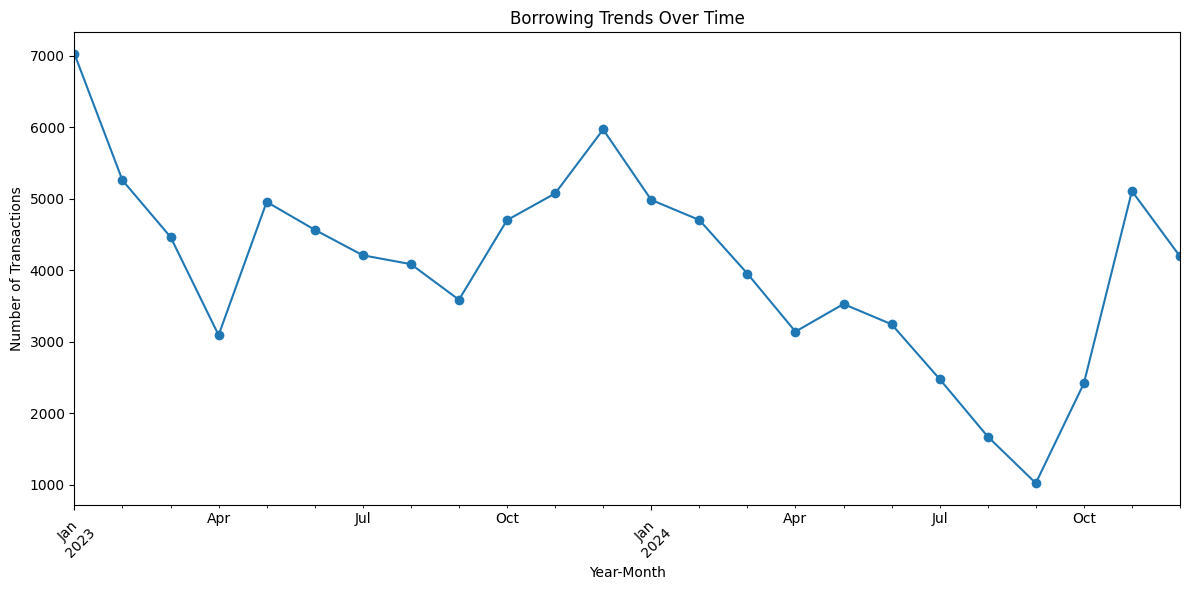

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the Date column is in datetime format (if not already)
df['Date'] = pd.to_datetime(df['date'], errors='coerce')

# Create additional time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['YearMonth'] = df['Date'].dt.to_period('M')

# Aggregate transactions per month
monthly_trends = df.groupby('YearMonth').size()

plt.figure(figsize=(12,6))
monthly_trends.plot(kind='line', marker='o')
plt.title("Borrowing Trends Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


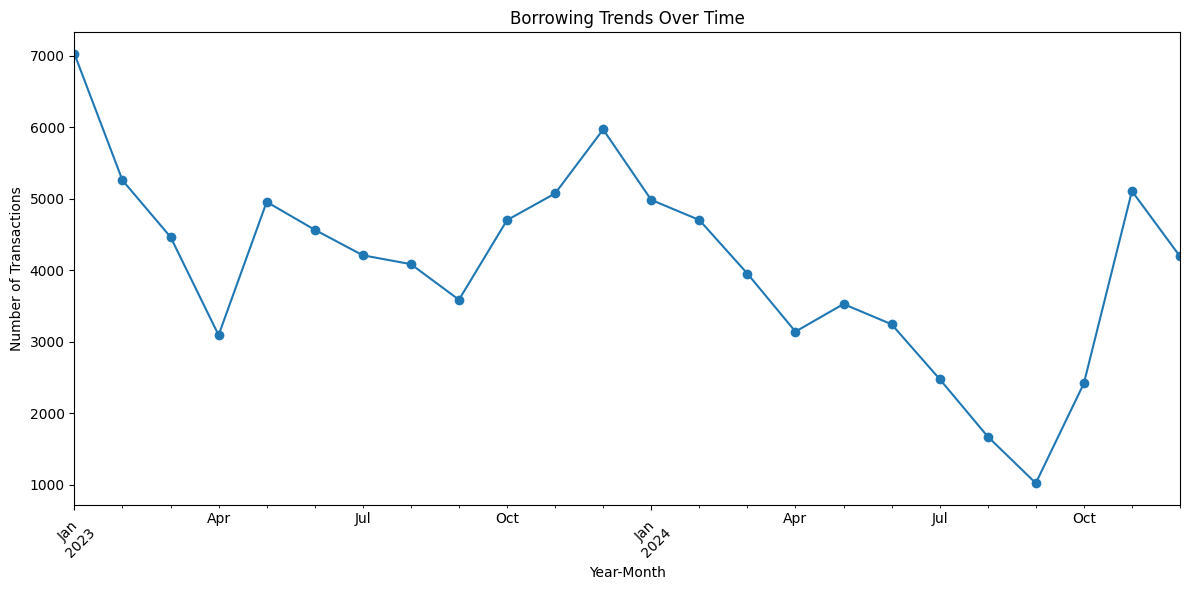

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the Date column is in datetime format (if not already)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create additional time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['YearMonth'] = df['Date'].dt.to_period('M')

# Aggregate transactions per month
monthly_trends = df.groupby('YearMonth').size()

plt.figure(figsize=(12,6))
monthly_trends.plot(kind='line', marker='o')
plt.title("Borrowing Trends Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-27-9a6726a6c5b2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_books.values, y=top_books.index, palette="viridis")


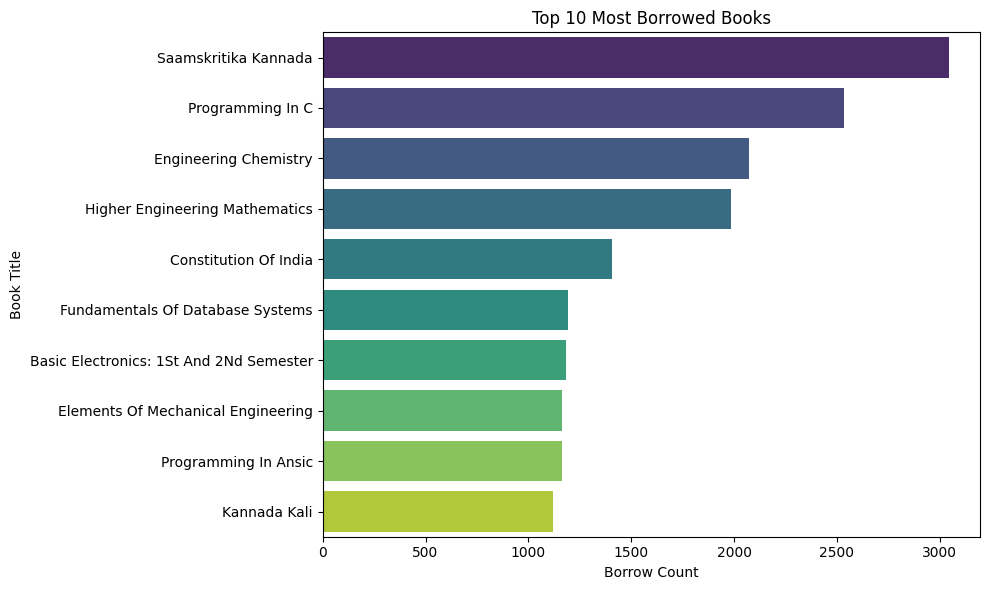

In [27]:
# Count the frequency of each book (Title)
top_books = df['title'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_books.values, y=top_books.index, palette="viridis")
plt.title("Top 10 Most Borrowed Books")
plt.xlabel("Borrow Count")
plt.ylabel("Book Title")
plt.tight_layout()
plt.show()


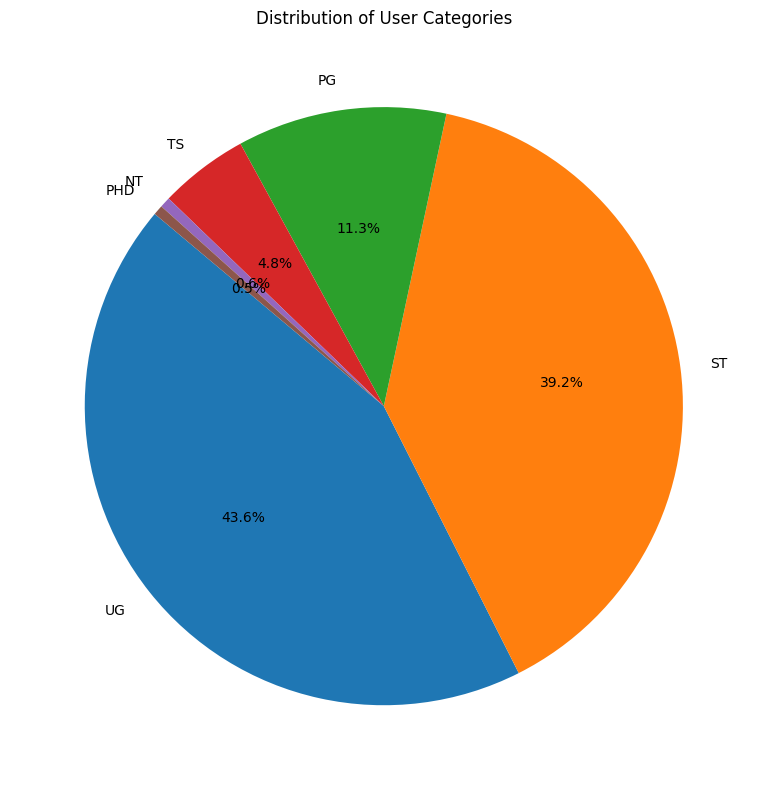

<ipython-input-29-e9f0bf21600e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.values, y=dept_counts.index, palette="magma")


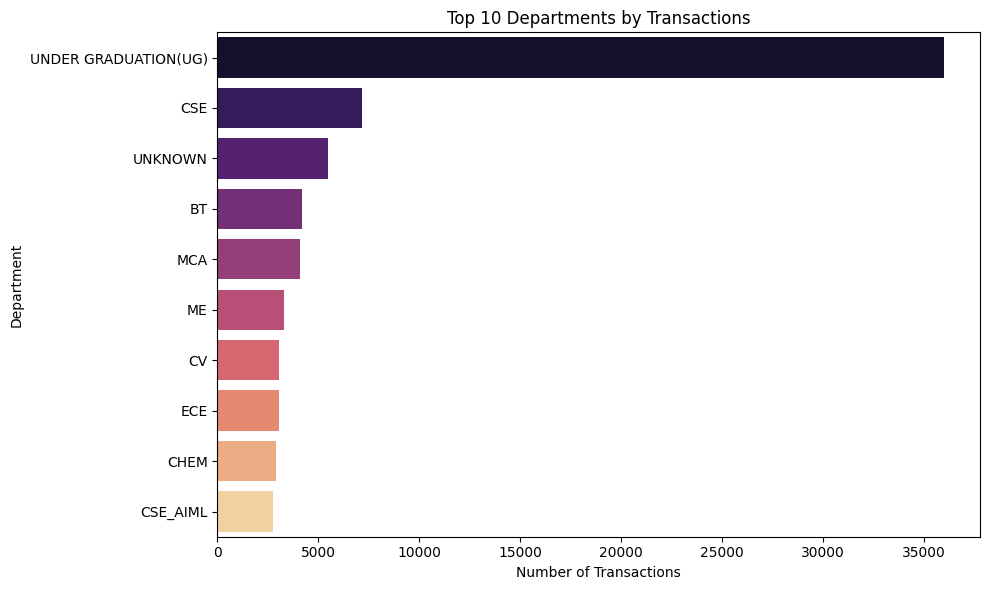

In [29]:
# Category Distribution
category_counts = df['category'].value_counts()

plt.figure(figsize=(8,8))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Distribution of User Categories")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Department Distribution (Bar Chart)
dept_counts = df['department'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=dept_counts.values, y=dept_counts.index, palette="magma")
plt.title("Top 10 Departments by Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Department")
plt.tight_layout()
plt.show()


In [32]:
!pip install pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Library Data Profiling Report")
profile.to_notebook_iframe()


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 64.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ab723f52ae36cd91616cecccc1578e4ddf830e546f9dfa216e3efd3cdb3f61f8
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.

AttributeError: module 'numba' has no attribute 'generated_jit'

In [34]:
import plotly.express as px
fig = px.line(df, x='date', y='transaction', title='Interactive Borrowing Trends')
fig.show()


<ipython-input-42-589a6df4ebf7>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.



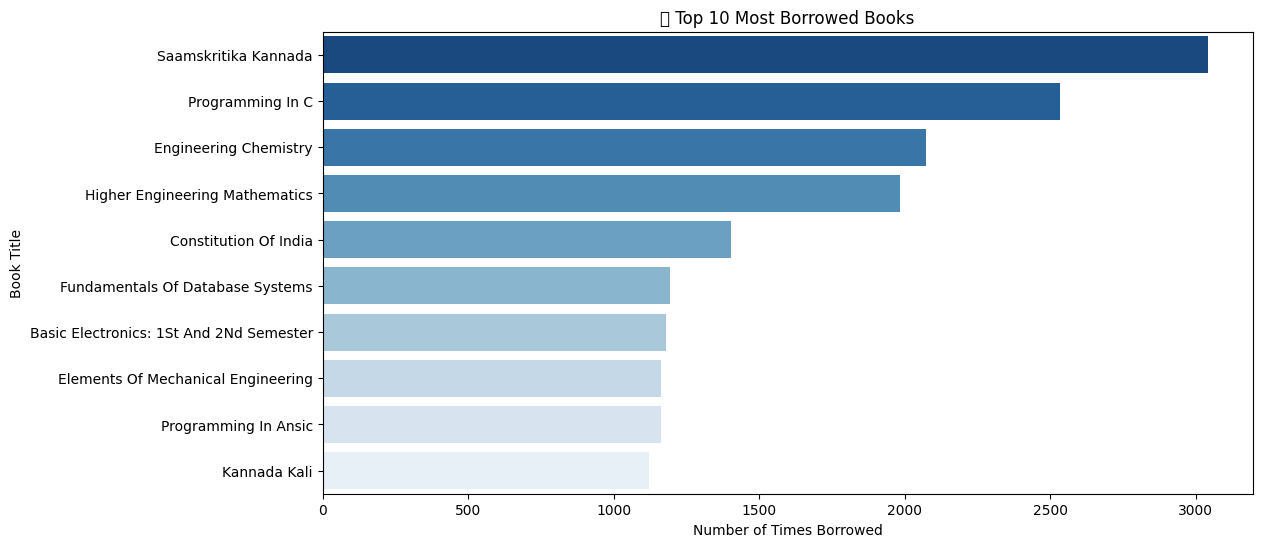

<ipython-input-42-589a6df4ebf7>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.



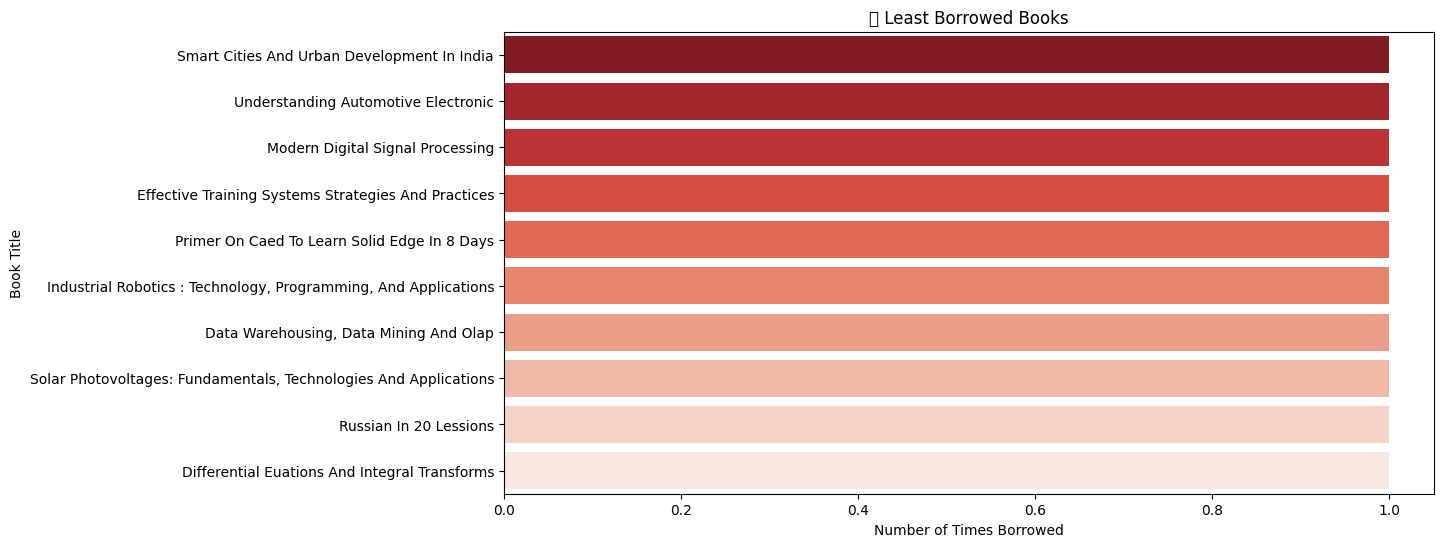

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.



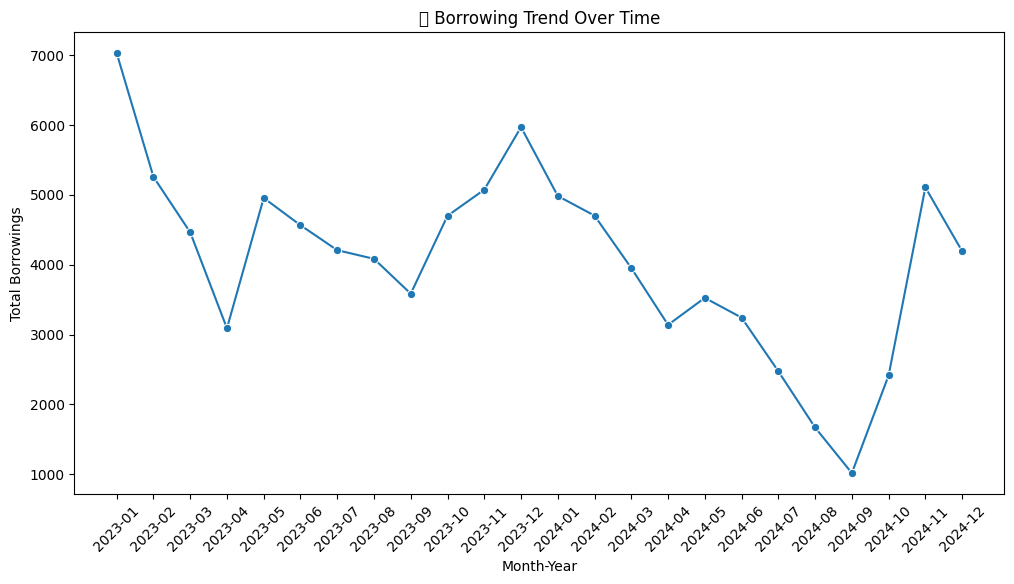

<ipython-input-42-589a6df4ebf7>:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127979 (\N{SCHOOL}) missing from font(s) DejaVu Sans.



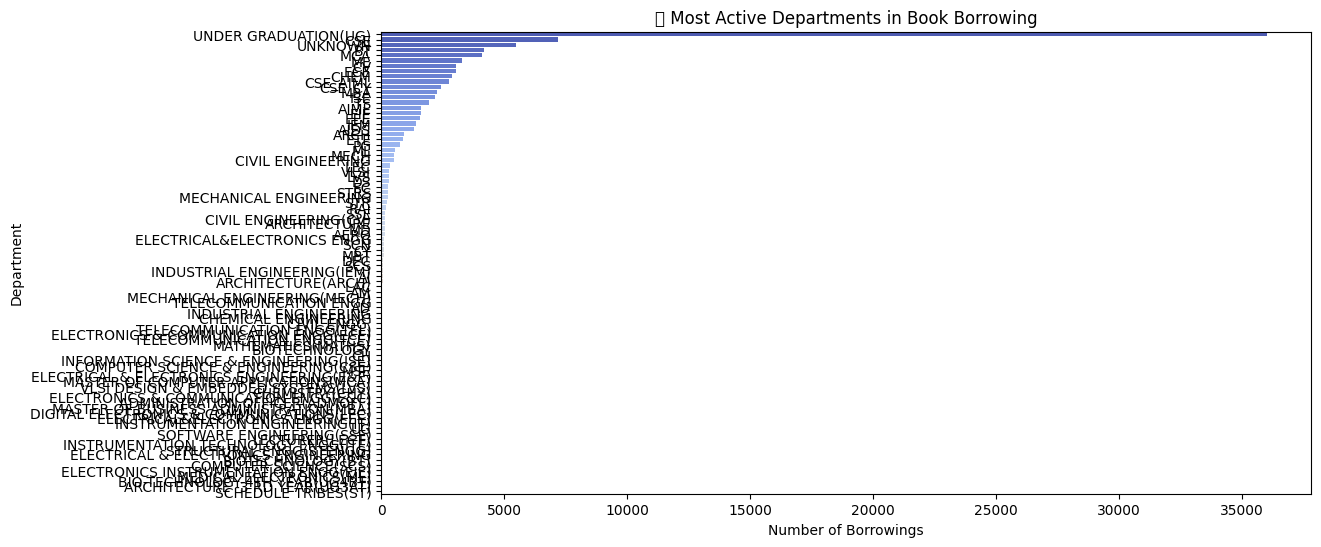

<ipython-input-42-589a6df4ebf7>:58: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.



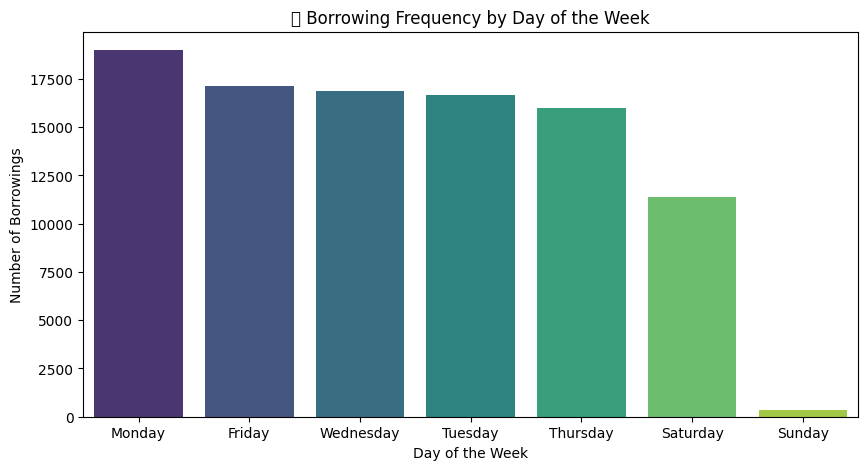

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.



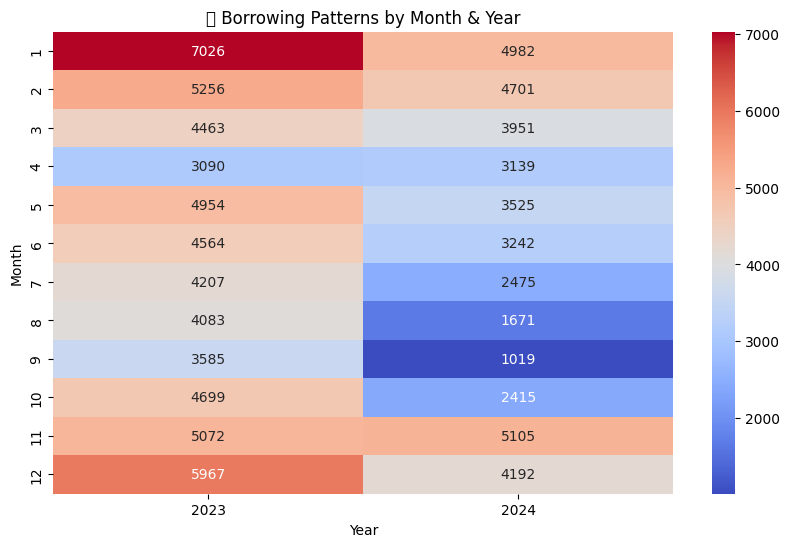

KeyError: 'Saamskritika Kannada'

In [42]:
# Install required libraries (if not installed)
!pip install pandas matplotlib seaborn

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
#file_path = "/content/Cleaned_Library_Data_Cleaned (1).csv"  # Update if necessary
#df = pd.read_csv(file_path)

# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# 🔥 1️⃣ Most Borrowed Books
top_books = df["title"].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_books.values, y=top_books.index, palette="Blues_r")
plt.xlabel("Number of Times Borrowed")
plt.ylabel("Book Title")
plt.title("📚 Top 10 Most Borrowed Books")
plt.show()

# 🔥 2️⃣ Least Borrowed Books
bottom_books = df["title"].value_counts().tail(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_books.values, y=bottom_books.index, palette="Reds_r")
plt.xlabel("Number of Times Borrowed")
plt.ylabel("Book Title")
plt.title("📉 Least Borrowed Books")
plt.show()

# 🔥 3️⃣ Borrowing Trends Over Time
df["Month-Year"] = df["Date"].dt.to_period("M")
monthly_trend = df["Month-Year"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_trend.index.astype(str), y=monthly_trend.values, marker="o")
plt.xlabel("Month-Year")
plt.ylabel("Total Borrowings")
plt.title("📅 Borrowing Trend Over Time")
plt.xticks(rotation=45)
plt.show()

# 🔥 4️⃣ Most Active Departments
dept_counts = df["department"].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=dept_counts.values, y=dept_counts.index, palette="coolwarm")
plt.xlabel("Number of Borrowings")
plt.ylabel("Department")
plt.title("🏫 Most Active Departments in Book Borrowing")
plt.show()

# 🔥 5️⃣ Day of the Week Analysis
df["Day of Week"] = df["Date"].dt.day_name()
day_counts = df["Day of Week"].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="viridis")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Borrowings")
plt.title("📆 Borrowing Frequency by Day of the Week")
plt.show()

# 🔥 6️⃣ Borrowing Patterns by Month & Year
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
heatmap_data = df.pivot_table(index="Month", columns="Year", aggfunc="size", fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt="d")
plt.title("⏳ Borrowing Patterns by Month & Year")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

# 🔥 7️⃣ Basic Recommendation Model (Find similar books)
# Finding books borrowed together frequently
borrowed_together = df.groupby("title")["department"].value_counts().unstack().fillna(0)
most_similar_books = borrowed_together.corr()

# Example: Recommending books similar to the most borrowed book
top_book = top_books.index[0]
recommended_books = most_similar_books[top_book].sort_values(ascending=False).head(6)
print(f"📖 Books similar to '{top_book}' (based on borrowing pattern):")
print(recommended_books)
